# Predicting Heart Disease Risk with Optimized k-NN Classifier

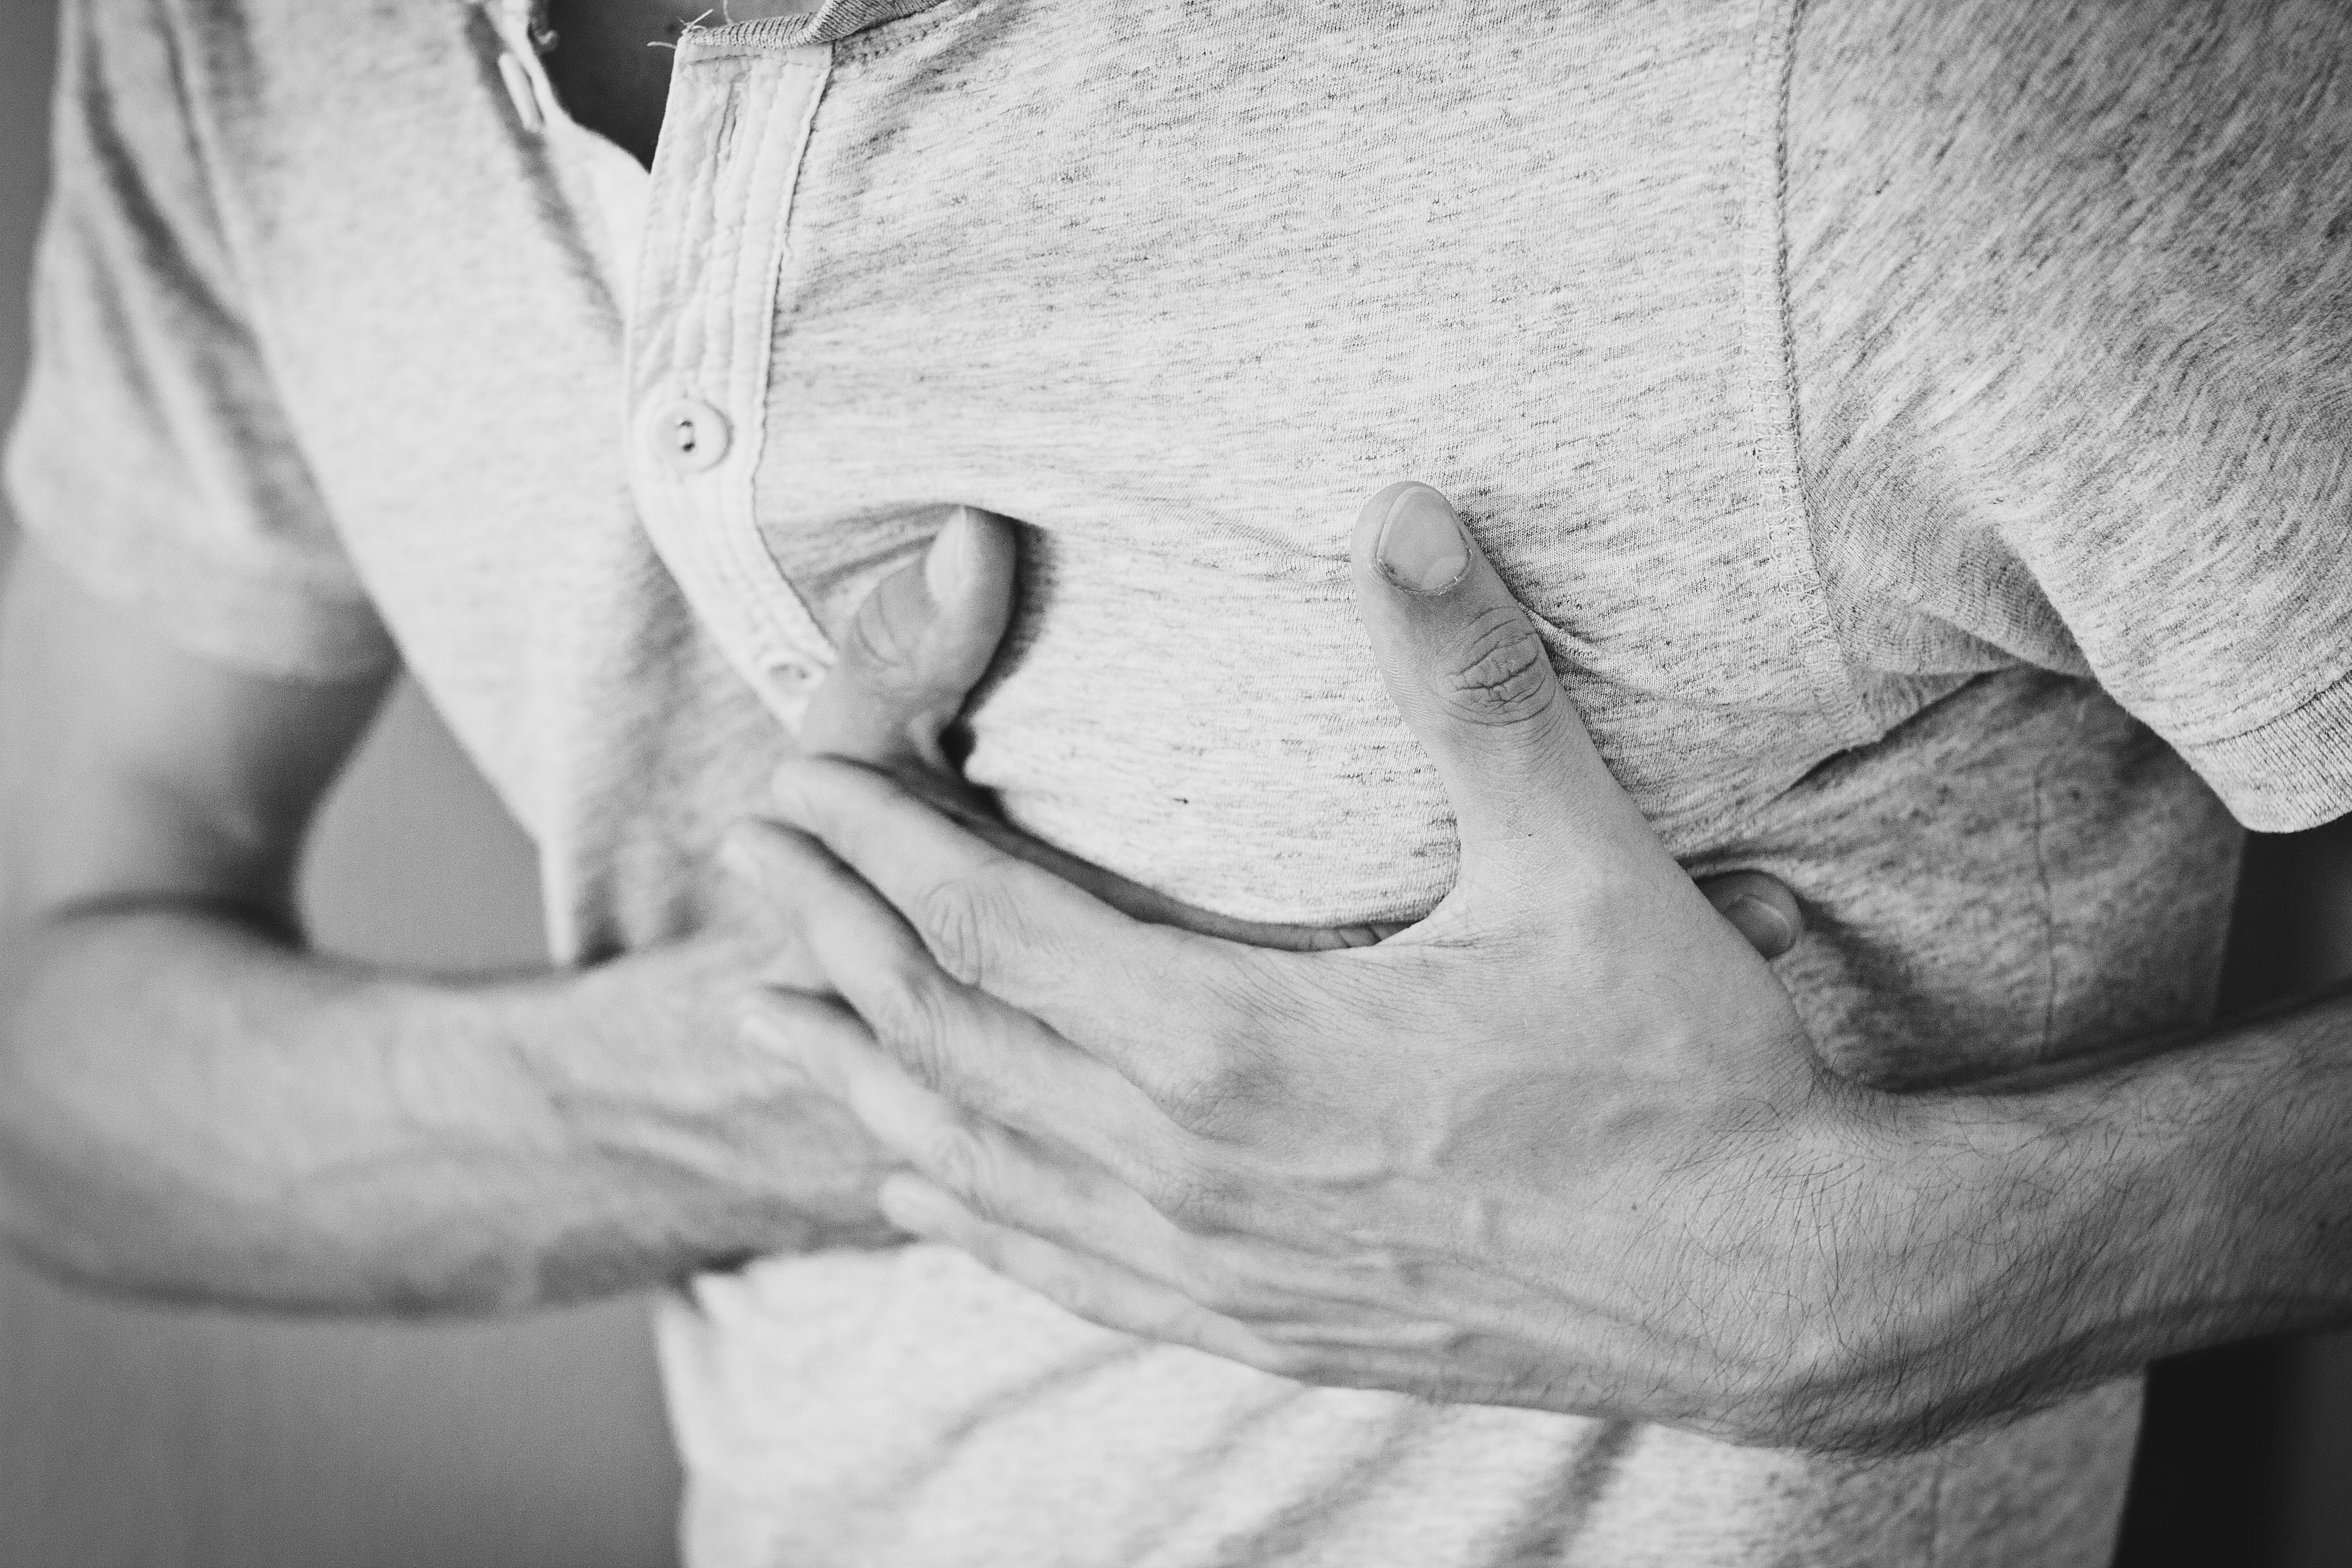

# Table of Contents

1. [Introduction](#Introduction)
2. [Loading and Examining the Data](#Loading-and-Examining-the-Data)
3. [Heart Disease Prediction Dataset Analysis](#Heart-Disease-Prediction-Dataset-Analysis)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Categorical Distributions by Heart Disease](#Categorical-Distributions-by-Heart-Disease)
6. [Numerical Distributions and Outliers](#Numerical-Distributions-and-Outliers)
7. [Data Cleaning & Preprocessing](#Data-Cleaning-&-Preprocessing)
8. [Handling Potential Data Issues in RestingBP and Cholesterol](#Handling-Potential-Data-Issues-in-RestingBP-and-Cholesterol)
9. [Handling Negative Values and Potential Outliers in Oldpeak](#Handling-Negative-Values-and-Potential-Outliers-in-Oldpeak)
10. [Feature Selection](#Feature-Selection)
11. [Building k-NN Classifiers With Individual Features](#Building-k-NN-Classifiers-With-Individual-Features)
12. [Building k-NN Classifier With All Selected Features](#Building-k-NN-Classifier-With-All-Selected-Features)
13. [Conclusion](#Conclusion)

# Introduction

The goal of this project is to predict the likelihood of heart disease using machine learning techniques, specifically focusing on optimizing k-Nearest Neighbors (k-NN) models. By leveraging a dataset containing key patient features, such as age, blood pressure, cholesterol, and chest pain type, the aim is to identify the most relevant features and build an effective predictive model.

To achieve this, I performed feature selection using Spearman correlation analysis, iterating through different thresholds to refine the selected features. Additionally, various preprocessing methods, such as scaling and hyperparameter optimization, were applied to enhance model performance. A RandomizedSearchCV approach was used to find the best combination of parameters for the k-NN classifier.

The final model achieved an accuracy of 86.60% on the training set and 88.77% on the test set. The optimal hyperparameters included a metric of "hamming", 15 neighbors, and uniform weighting. These results suggest that the model is capable of providing reliable predictions, and further improvements could be made by exploring additional algorithms or data features.

# Loading and Examining the Data

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("heart_disease_prediction.csv")

# Display dataset overview
display(df.head())
print("="*43)
print(" HEART DISEASE PREDICTION DATASET OVERVIEW ")
print("="*43, "\n")
print(df.info(), "\n")
print("="*43)
print(" DATA SUMMARY ")
print("="*43, "\n")
print(df.describe().transpose(), "\n")
print("="*43)
print(" MISSING VALUES ")
print("="*43, "\n")
print(df.isnull().sum(), "\n")

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

 HEART DISEASE PREDICTION DATASET OVERVIEW 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None 

 DATA SUMMARY 

              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.

# Heart Disease Prediction Dataset Analysis  

---

## 📊 Dataset Overview  
- **Total Entries**: 918  
- **Total Features**: 12 (Numerical & Categorical)  
- **Missing Values**: None, but potential data quality issues exist.  

---

## 🔍 Feature Breakdown  

### **Demographics & Basic Info**  
- **Age**: Ranges from **28 to 77 years**.  
- **Sex**: Categorical (Male/Female).  

### **Medical Measurements**  
- **RestingBP (Resting Blood Pressure)**: **0–200 mmHg** (A **minimum of 0** suggests possible errors).  
- **Cholesterol**: **0–603 mg/dl** (Possible **0-value inconsistencies**).  
- **MaxHR (Maximum Heart Rate Achieved)**: **60–202 bpm** (Values appear physiologically reasonable).  
- **Oldpeak (ST Depression)**: **Average: 0.88**, but **negative values (-2.6) require review**.  

### **Categorical Health Indicators**  
- **ChestPainType**: Four categories (TA, ATA, NAP, ASY).  
- **FastingBS (Fasting Blood Sugar)**: Binary (0 or 1, where 1 = **FBS > 120 mg/dl**).  
- **RestingECG**: Three categories (Normal, ST, LVH).  
- **ExerciseAngina**: Binary (Y/N).  
- **ST_Slope**: Three categories (Up, Flat, Down).  

### **Target Variable**  
- **HeartDisease**: Binary (0 = No Heart Disease, 1 = Heart Disease).  

---

## 📉 Summary Statistics  

| Feature         | Mean  | Standard Deviation | Notes |
|----------------|-------|--------------------|------------------------|
| **Age**        | 53.5  | 9.43               | Typical patient age. |
| **RestingBP**  | 132.4 | —                  | **Min = 0**, possible data entry error. |
| **Cholesterol**| 198.8 | —                  | **0 values** could indicate missing data. |
| **MaxHR**      | 136.8 | —                  | Appears within normal physiological ranges. |
| **Oldpeak**    | 0.88  | —                  | **Negative values (-2.6) may require review.** |

---

## ⚠️ Data Quality Considerations  
- **No missing values**, but:  
  - **RestingBP & Cholesterol contain 0s**, which may indicate missing or misrecorded data.  
  - **Oldpeak has negative values**, which may require further investigation.  

These potential issues should be addressed before further analysis or model training.  

[Back to Table of Contents](#Table-of-Contents)


# Exploratory Data Analysis

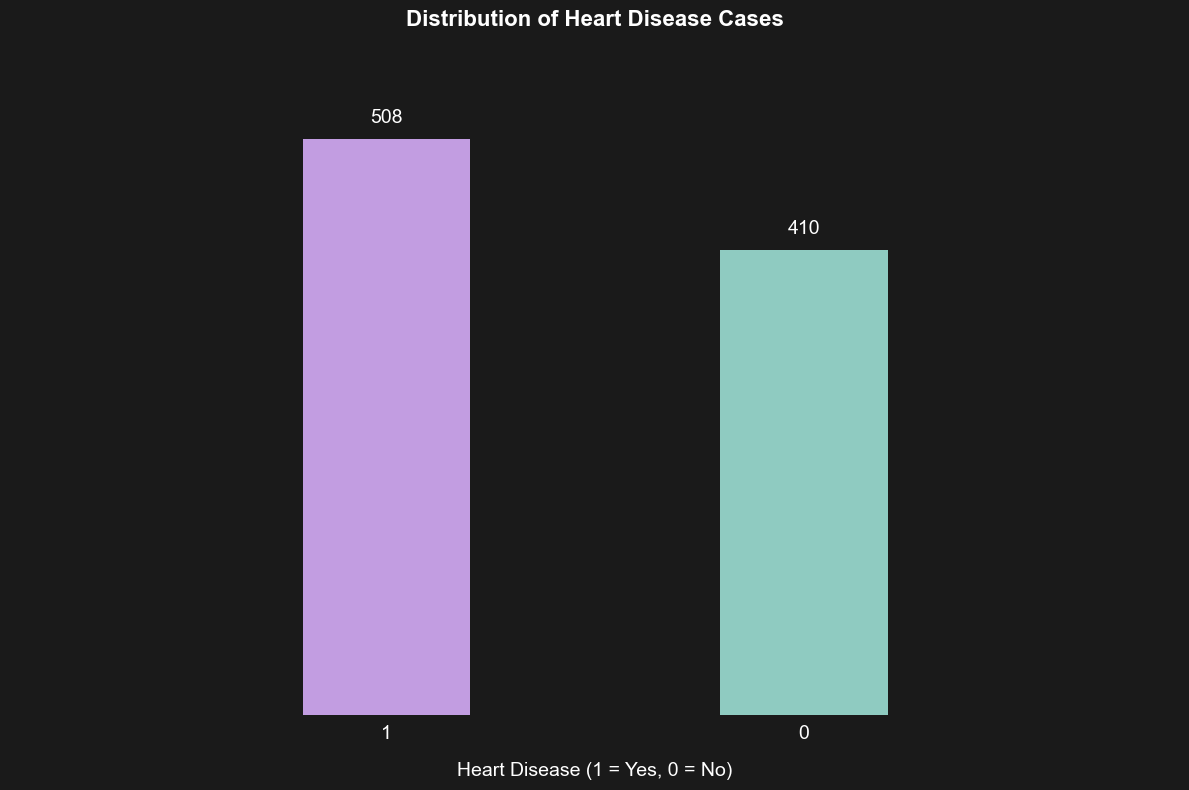

In [2]:
# Custom plot style
sns.set_style("dark")
plt.rcParams.update({
    "axes.facecolor": "#1a1a1a",
    "figure.facecolor": "#1a1a1a",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "xtick.labelsize": 12,
    "ytick.color": "white",
    "ytick.labelsize": 12,
    "grid.color": "gray",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 14,
    "axes.labelpad": 14,
    "axes.titlecolor": "white",
    "axes.edgecolor": "#1a1a1a"
})

# Count occurrences of heart disease cases
heart_disease_counts = df['HeartDisease'].value_counts()

# Create a figure for the bar chart, setting size and background color
plt.figure(figsize=(12, 8), facecolor='#1a1a1a')

# Create a bar plot with custom colors
ax = sns.barplot(
    x=heart_disease_counts.index.astype(str),  # Convert index to string for labels
    y=heart_disease_counts.values,             # Bar heights
    hue=heart_disease_counts.values,           # Use values to differentiate colors
    palette=["#85d5c8", "#c392ec"],            # Custom colors
    legend=False,                              # Hide legend
    width=0.4,                                 # Adjust bar width
    edgecolor='none'
)

# Add title, remove x-axis label, adjust tick styles
ax.set_title("Distribution of Heart Disease Cases", fontsize=16, weight='bold', color="white")
ax.set_xlabel("Heart Disease (1 = Yes, 0 = No)", labelpad=14)
ax.set_ylabel("")
plt.xticks(fontsize=14, color="white")  # Adjust x-axis labels
plt.yticks([], [])                      # Remove y-axis ticks
plt.ylim(0, 600)
ax.margins(x=0.5)

# Add values on top of each bar
for index, value in enumerate(heart_disease_counts.values):
    ax.text(index, value + 10,   # Position text slightly above the bar
            f'{value:,}',        # Format value with commas
            ha='center',         # Center text horizontally
            va='bottom',         # Align text to the bottom
            fontsize=14,         # Font size
            color="white")       # Use white for visibility

# Remove grid borders
sns.despine(bottom=True, left=True)

# Display the plot
plt.tight_layout()
plt.show()

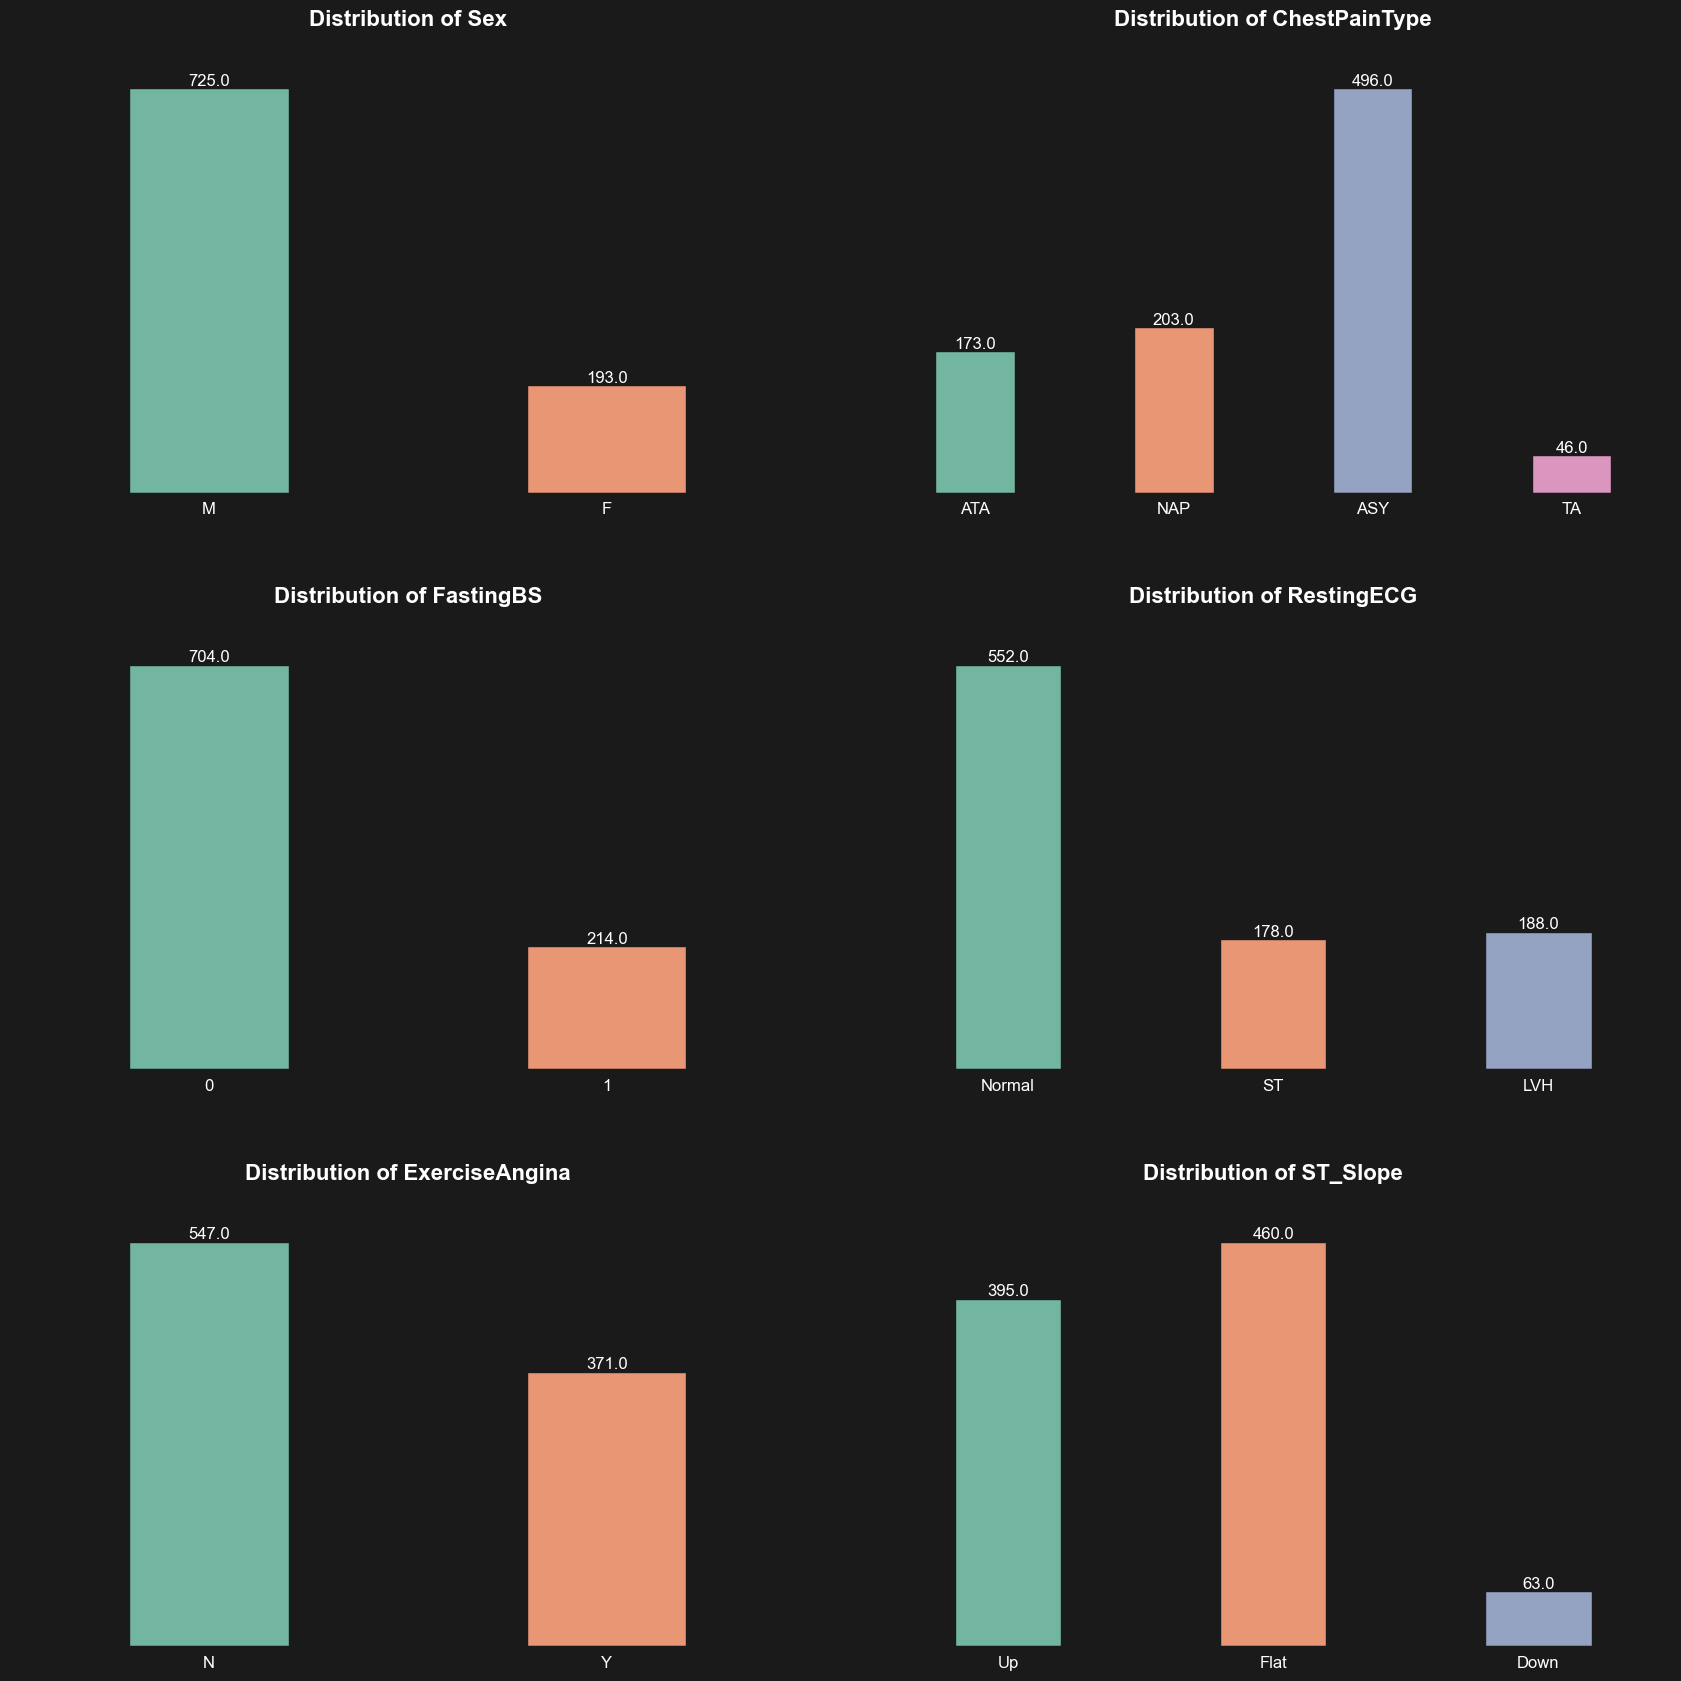

In [3]:
# List of categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Set up the subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot bar charts for each categorical column
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, palette=("Set2"), hue=col, legend=False, edgecolor="#1a1a1a", width=.4)
    
    # Add titles and labels
    ax.set_title(f'Distribution of {col}', pad=30)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='white', xytext=(0, 5),
                    textcoords='offset points')

# Adjust layout for better spacing
plt.tight_layout(pad=5)
plt.show()

## 📊 Distribution of Categorical Variables  

Below is an analysis of how categorical variables are distributed within the dataset.  

---

### **1. Sex**  
- **Male**: 725 (🔹 79%)  
- **Female**: 193 (🔹 21%)  
- 📌 The dataset is **imbalanced** in terms of gender, with significantly more male patients.  

### **2. Chest Pain Type (ChestPainType)**  
- **ASY (Asymptomatic)**: 496 (🔹 54%)  
- **NAP (Non-Anginal Pain)**: 203 (🔹 22%)  
- **ATA (Atypical Angina)**: 173 (🔹 19%)  
- **TA (Typical Angina)**: 46 (🔹 5%)  
- 📌 **ASY is the most common**, while **TA cases are relatively rare**.  

### **3. Fasting Blood Sugar (FastingBS)**  
- **0 (FBS < 120 mg/dL)**: 704 (🔹 77%)  
- **1 (FBS ≥ 120 mg/dL)**: 214 (🔹 23%)  
- 📌 The majority of patients have **normal fasting blood sugar levels**.  

### **4. Resting ECG (RestingECG)**  
- **Normal**: 552 (🔹 60%)  
- **LVH (Left Ventricular Hypertrophy)**: 188 (🔹 20%)  
- **ST (ST-T Wave Abnormality)**: 178 (🔹 19%)  
- 📌 **Most patients have normal ECG results**, with abnormal findings being less common.  

### **5. Exercise-Induced Angina (ExerciseAngina)**  
- **No (N)**: 547 (🔹 60%)  
- **Yes (Y)**: 371 (🔹 40%)  
- 📌 **Exercise-induced angina is less prevalent**, but still present in a significant portion of patients.  

### **6. ST Slope (ST_Slope)**  
- **Flat**: 460 (🔹 50%)  
- **Up**: 395 (🔹 43%)  
- **Down**: 63 (🔹 7%)  
- 📌 **Flat ST slopes** are the most common, while **Down slopes are rare**.  

---

### 🔎 Key Takeaways  
- **Gender Imbalance**: The dataset is **male-dominated** (79%).  
- **Chest Pain Variability**: **Asymptomatic (ASY) pain** is the most frequent, while **Typical Angina (TA) is rare**.  
- **Blood Sugar & ECG Trends**: **Most patients have normal fasting blood sugar** and **normal ECG results**.  
- **Exercise & ST Slope Patterns**: **Exercise-induced angina is less common**, and **Flat ST slopes are the most observed**.  

[Back to Table of Contents](#Table-of-Contents)


# Categorical Distributions by Heart Disease

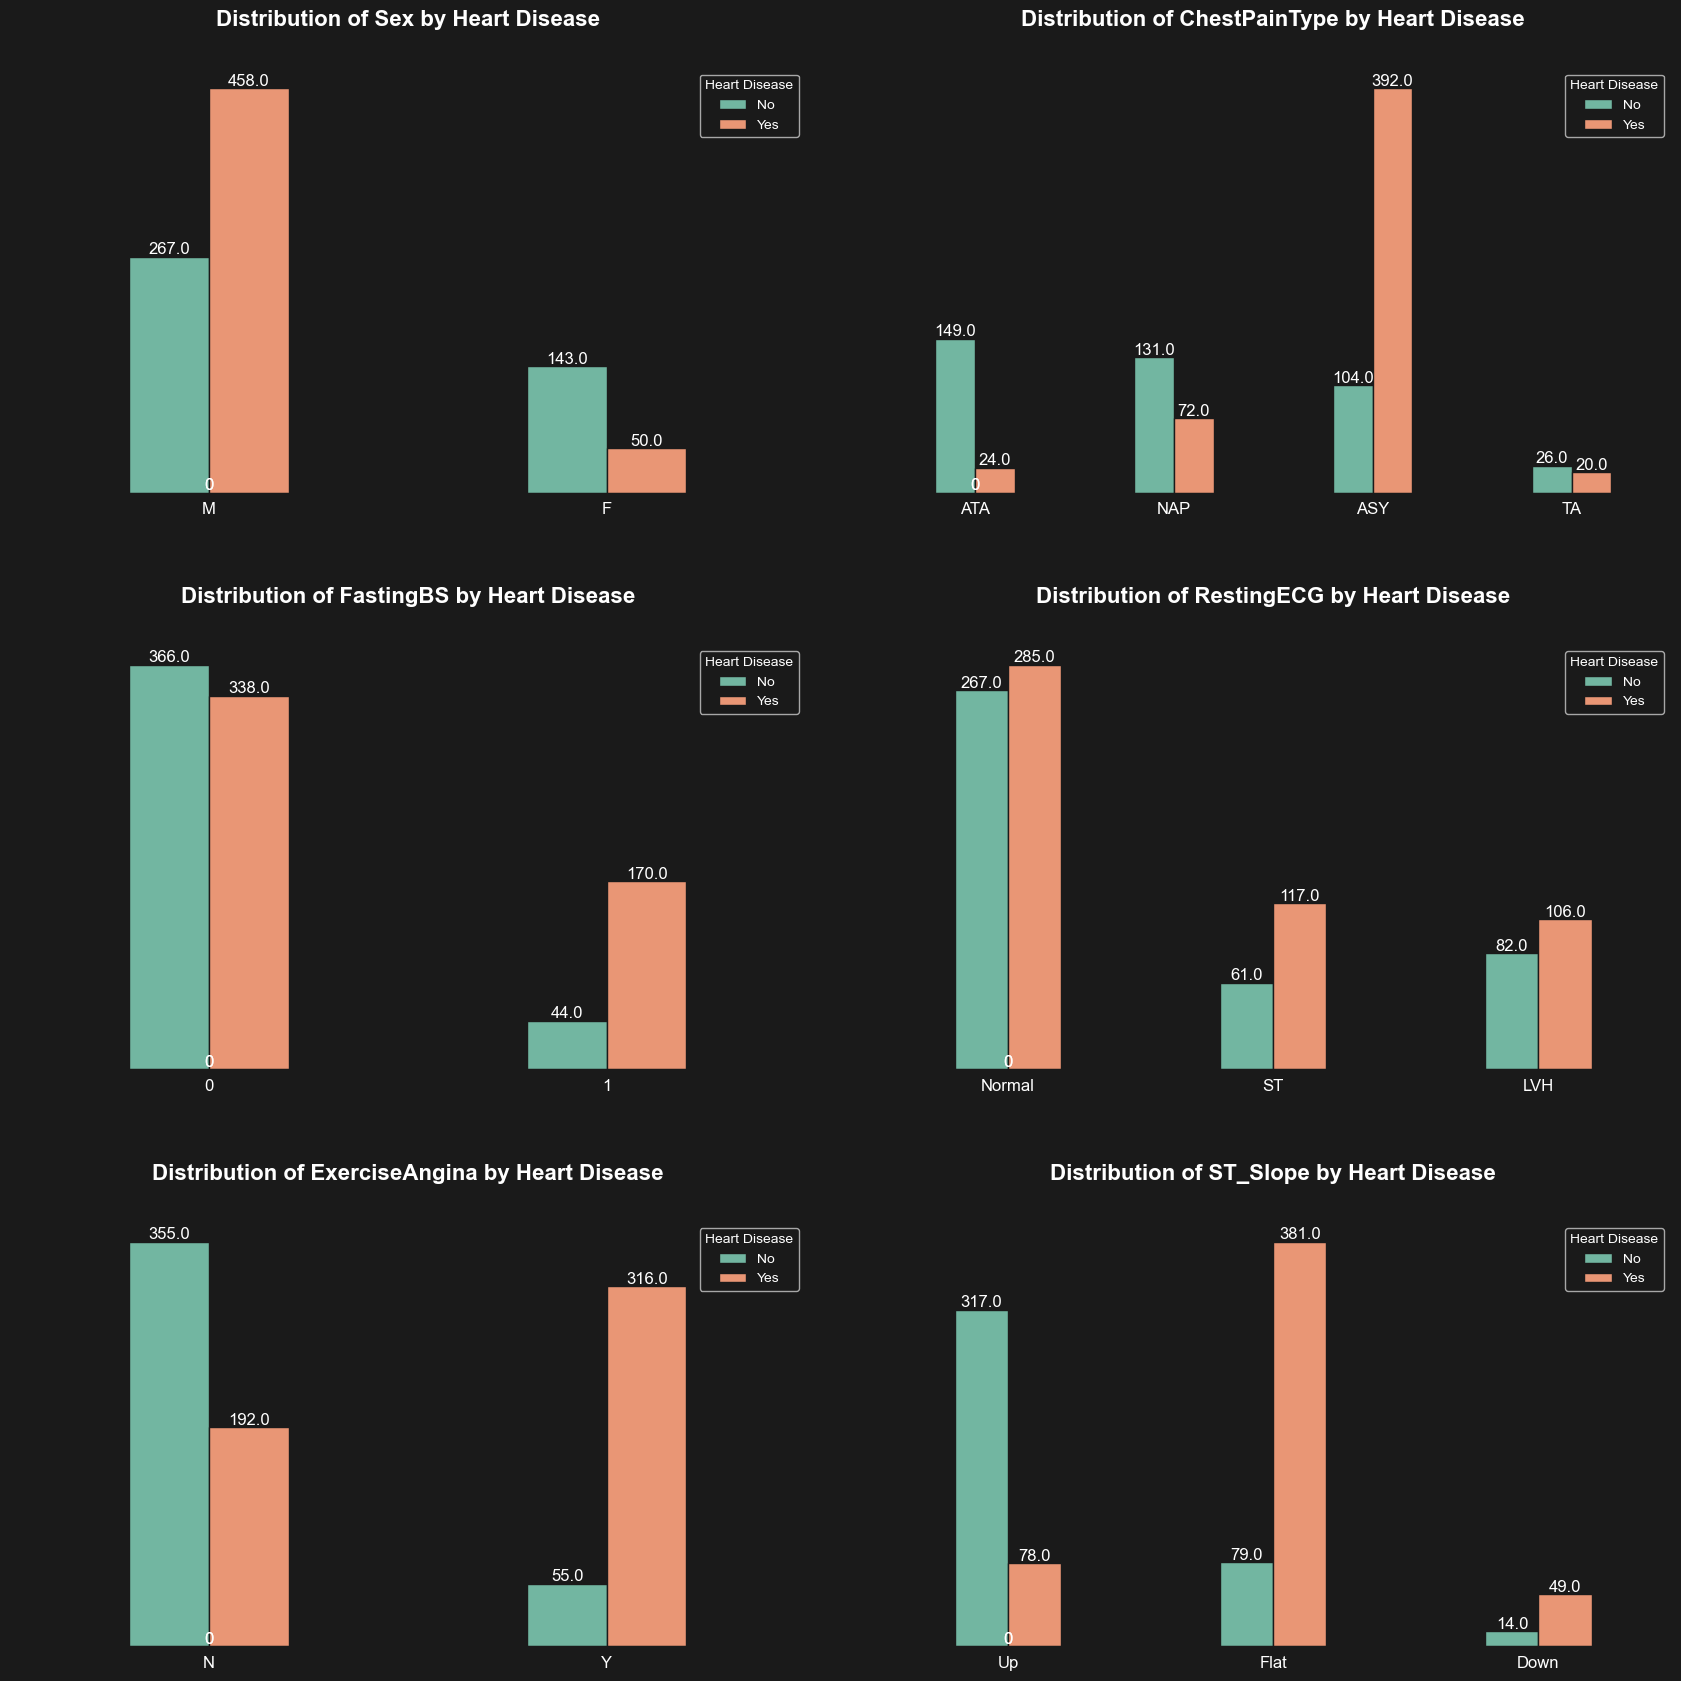

In [4]:
# Set up the subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot bar charts for each categorical column
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, palette='Set2', hue='HeartDisease', edgecolor="#1a1a1a", width=.4)
    
    # Add titles and labels
    ax.set_title(f'Distribution of {col} by Heart Disease', pad=30)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='white',
                    xytext=(0, 5), textcoords='offset points')

    # Add a legend
    leg = ax.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'], labelcolor='white')
    
    # Change the title color of the legend
    leg.get_title().set_color('white')

# Adjust layout for better spacing
plt.tight_layout(pad=5)
plt.show()

## Heart Disease Analysis by Categorical Variables  

This analysis explores the distribution of heart disease cases across key categorical variables in the dataset.  

---

### 🔹 **1. Sex & Heart Disease**  
- **Males (M)**: **458 cases**  
- **Females (F)**: **50 cases**  
- 📌 **Heart disease is significantly more common in males** in this dataset.  

---

### 🔹 **2. Chest Pain Type (ChestPainType)**  
- **ASY (Asymptomatic)**: **392 cases**  
- **NAP (Non-Anginal Pain)**: **72 cases**  
- **ATA (Atypical Angina)**: **24 cases**  
- **TA (Typical Angina)**: **20 cases**  
- 📌 **Heart disease is most prevalent in individuals with asymptomatic chest pain (ASY)**.  

---

### 🔹 **3. Fasting Blood Sugar (FastingBS)**  
- **FastingBS = 0 (Normal Blood Sugar)**: **338 cases**  
- **FastingBS = 1 (High Blood Sugar)**: **170 cases**  
- 📌 **Heart disease is more frequent in individuals with normal blood sugar levels**, though high blood sugar remains a risk factor.  

---

### 🔹 **4. Resting ECG (RestingECG)**  
- **Normal**: **285 cases**  
- **ST-Segment Abnormality (ST)**: **117 cases**  
- **Left Ventricular Hypertrophy (LVH)**: **106 cases**  
- 📌 **Most heart disease cases occur in individuals with a normal resting ECG**, but abnormalities also show significant numbers.  

---

### 🔹 **5. Exercise-Induced Angina (ExerciseAngina)**  
- **Yes (Y)**: **316 cases**  
- **No (N)**: **192 cases**  
- 📌 **Exercise-induced angina is strongly associated with heart disease** in this dataset.  

---

### 🔹 **6. ST Slope (ST_Slope)**  
- **Flat**: **381 cases**  
- **Up**: **78 cases**  
- **Down**: **49 cases**  
- 📌 **A flat ST slope is the most common among individuals with heart disease**.  

---

## 🔎 **Key Takeaways**  
- **Males are more affected** by heart disease in this dataset.  
- **Asymptomatic chest pain (ASY)** is the most common chest pain type among those diagnosed.  
- **Exercise-induced angina (Y) and a flat ST slope** are strong indicators of heart disease.  
- **Fasting blood sugar and resting ECG results vary**, showing that heart disease occurs across different health profiles.  

[Back to Table of Contents](#Table-of-Contents)


# Numerical Distributions and Outliers

In [5]:
# List of numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create a dataframe with summary statistics
summary_df = df[numerical_columns].describe().T

# Add IQR and outlier boundaries
summary_df['IQR'] = summary_df['75%'] - summary_df['25%']
summary_df['Lower Bound'] = summary_df['25%'] - 1.5 * summary_df['IQR']
summary_df['Upper Bound'] = summary_df['75%'] + 1.5 * summary_df['IQR']

# Display the dataframe
summary_df

count        mean         std   min     25%    50%    75%    max  \
Age          918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0   
RestingBP    918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0   
Cholesterol  918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0   
MaxHR        918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0   
Oldpeak      918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2   

               IQR  Lower Bound  Upper Bound  
Age          13.00       27.500       79.500  
RestingBP    20.00       90.000      170.000  
Cholesterol  93.75       32.625      407.625  
MaxHR        36.00       66.000      210.000  
Oldpeak       1.50       -2.250        3.750

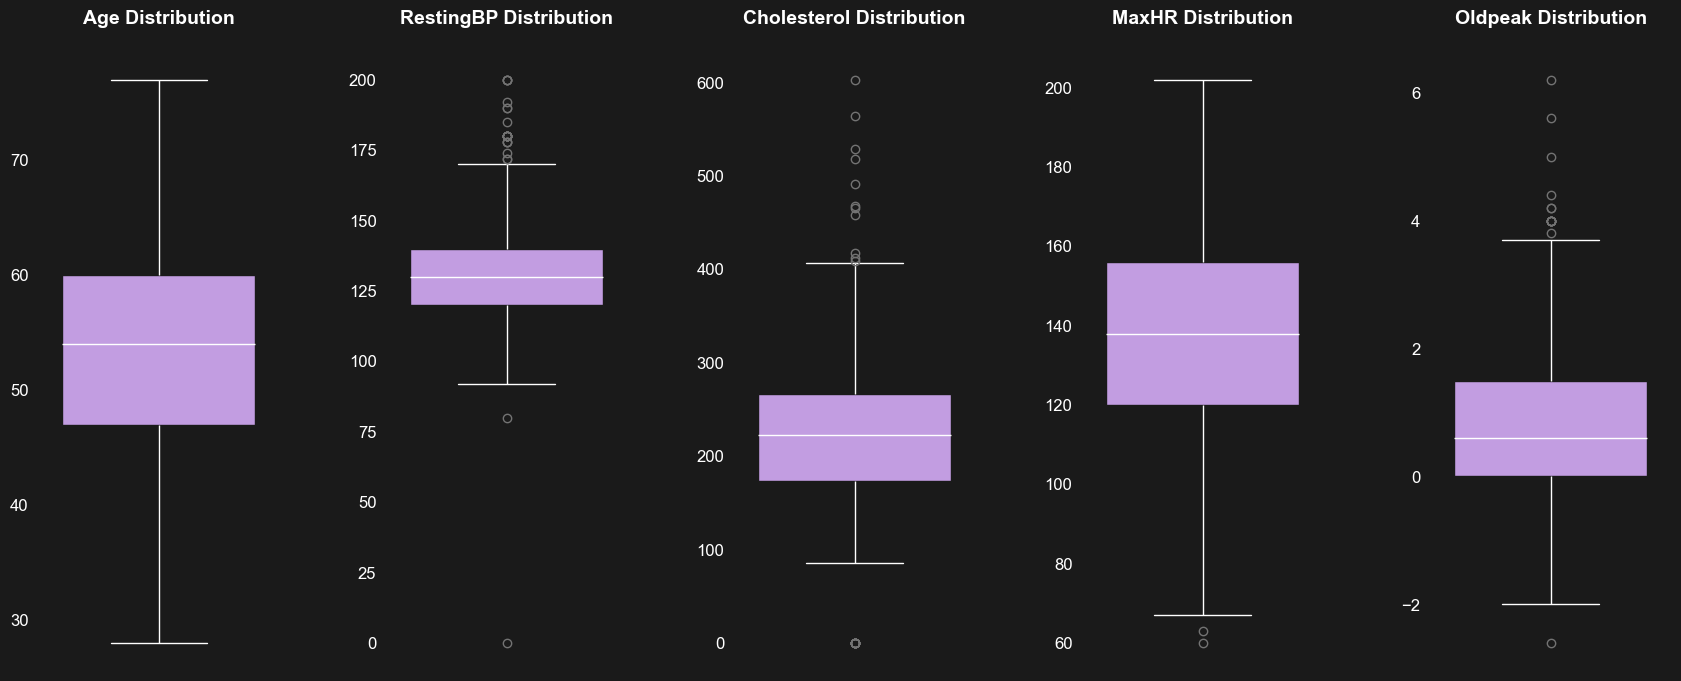

In [6]:
# Set up the subplots
fig, axes = plt.subplots(1, 5, figsize=(18, 8))

# Plot box plots for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(data=df, y=col, ax=ax, color='#c392ec', boxprops=dict(edgecolor="#1a1a1a"), 
                medianprops=dict(color="white"), whiskerprops=dict(color="white"), capprops=dict(color="white"))
    
    ax.set_title(f'{col} Distribution', fontsize=14, pad=20)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.grid(False)

# Adjust layout for better spacing
plt.tight_layout(pad=5)
plt.show()

## 📊 Analysis of Numerical Distributions  

This section explores key numerical variables in the dataset, identifying trends, potential outliers, and data quality issues.  

---

### 🔹 **Age**  
- **Mean**: 53.5 years | **Standard Deviation**: 9.43 years  
- **Range**: 28 – 77 years (reasonable for a heart disease study)  
- ✅ **No extreme outliers** based on data distribution.  

---

### 🔹 **Resting Blood Pressure (RestingBP)**  
- **Mean**: 132.4 mmHg | **Standard Deviation**: 18.51 mmHg  
- **Range**: 0 – 200 mmHg (**⚠️ 0 is an error**)  
- **IQR (Interquartile Range)**: 90 – 170 mmHg  
- ⚠️ **Values above 170 mmHg may be potential outliers**.  

---

### 🔹 **Cholesterol**  
- **Mean**: 198.8 mg/dL | **Standard Deviation**: 109.38 mg/dL  
- **Range**: 0 – 603 mg/dL (**⚠️ 0 likely represents missing data**)  
- **IQR**: Values above 407.6 mg/dL may be outliers  
- ⚠️ **High values (up to 603 mg/dL) suggest extreme cases**.  

---

### 🔹 **Maximum Heart Rate (MaxHR)**  
- **Mean**: 136.8 bpm | **Standard Deviation**: 25.46 bpm  
- **Range**: 60 – 202 bpm (✅ Within physiological limits)  
- ✅ **No major outliers detected**.  

---

### 🔹 **ST Depression (Oldpeak)**  
- **Mean**: 0.89 | **Standard Deviation**: 1.07  
- **Range**: -2.6 – 6.2 (**⚠️ Negative value is likely an error**)  
- **IQR**: Values above 3.75 may be outliers  
- ⚠️ **Possible extreme values above 6.2**.  

---

### ⚠️ **Summary of Issues Identified**  
✔ **RestingBP** contains **zero values**, which need correction.  
✔ **Cholesterol** has **zero values**, likely representing missing data.  
✔ **Oldpeak** has a **negative value (-2.6)** that requires investigation.  
✔ **Potential outliers** in **Cholesterol (>407.6 mg/dL) & Oldpeak (>3.75)** may require further review.  

[Back to Table of Contents](#Table-of-Contents)


# Data Cleaning & Preprocessing

## Handling Potential Data Issues in RestingBP and Cholesterol

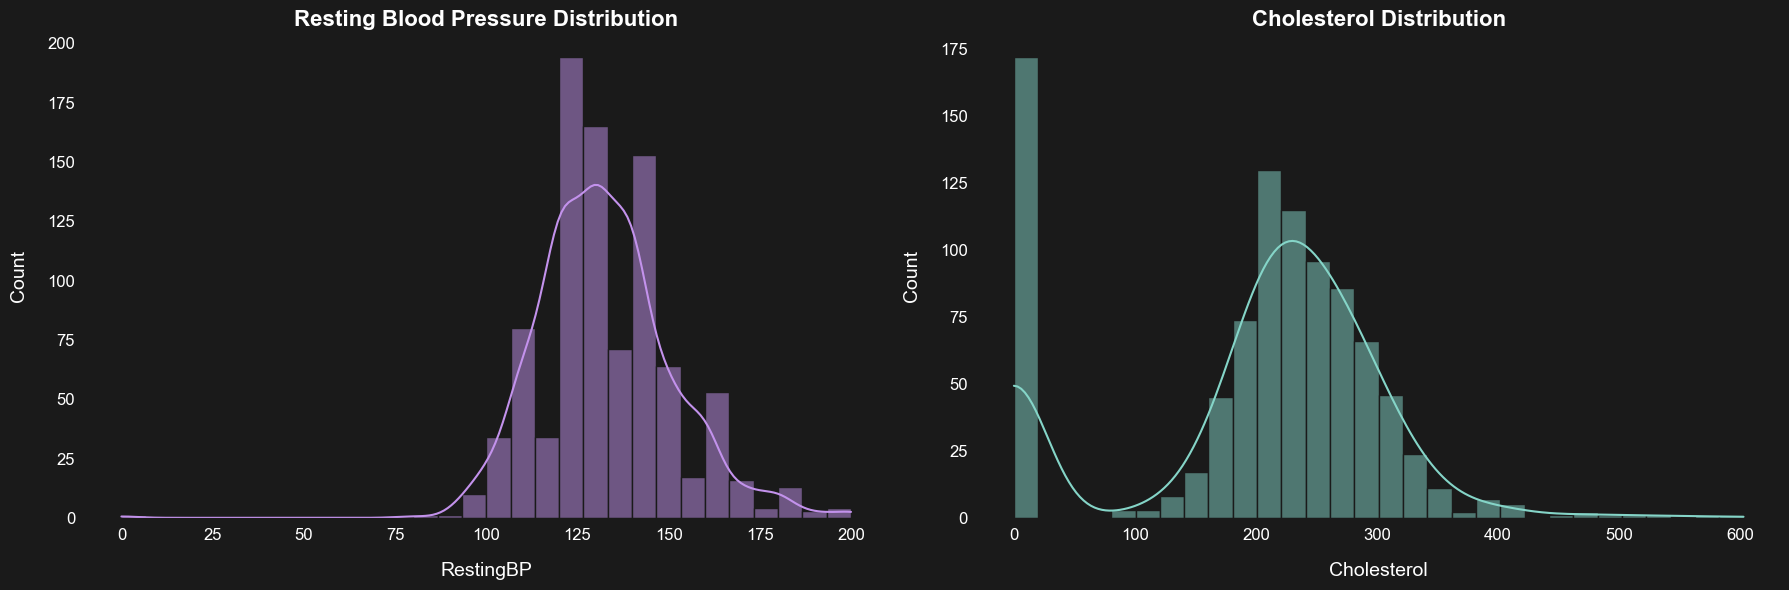

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Two subplots side by side

# RestingBP Distribution
sns.histplot(df["RestingBP"], bins=30, kde=True, color="#c392ec", ax=axes[0], edgecolor="#1a1a1a")
axes[0].set_title("Resting Blood Pressure Distribution", color="white")
axes[0].set_xlabel("RestingBP")
axes[0].set_ylabel("Count")

# Cholesterol Distribution
sns.histplot(df["Cholesterol"], bins=30, kde=True, color="#85d5c8", ax=axes[1], edgecolor="#1a1a1a")
axes[1].set_title("Cholesterol Distribution", color="white")
axes[1].set_xlabel("Cholesterol")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

## ⚠️ Data Issues in RestingBP and Cholesterol  

This section highlights and addresses key data quality issues in **RestingBP** and **Cholesterol**.  

---

### 🔹 **Resting Blood Pressure (RestingBP)**  
- **Issue**: One data point has a value of **0**, which is **not physiologically valid**.  
- **Solution**: Since there is only **one incorrect value**, replacing it with the **median** ensures minimal data distortion.  

---

### 🔹 **Cholesterol**  
- **Issue 1**: **172 records** have a cholesterol value of **0**, which is **not realistic** since cholesterol levels are always positive.  
- **Issue 2**: Some values exceed **500 mg/dL**, which is **rare and considered extremely high**.  
- **Solution**:  
  - Replace **0 values** with the **median cholesterol level** for a more accurate distribution.  
  - **Cap values at 500 mg/dL** to ensure a **realistic range** while preserving high cholesterol cases.  

[Back to Table of Contents](#Table-of-Contents)


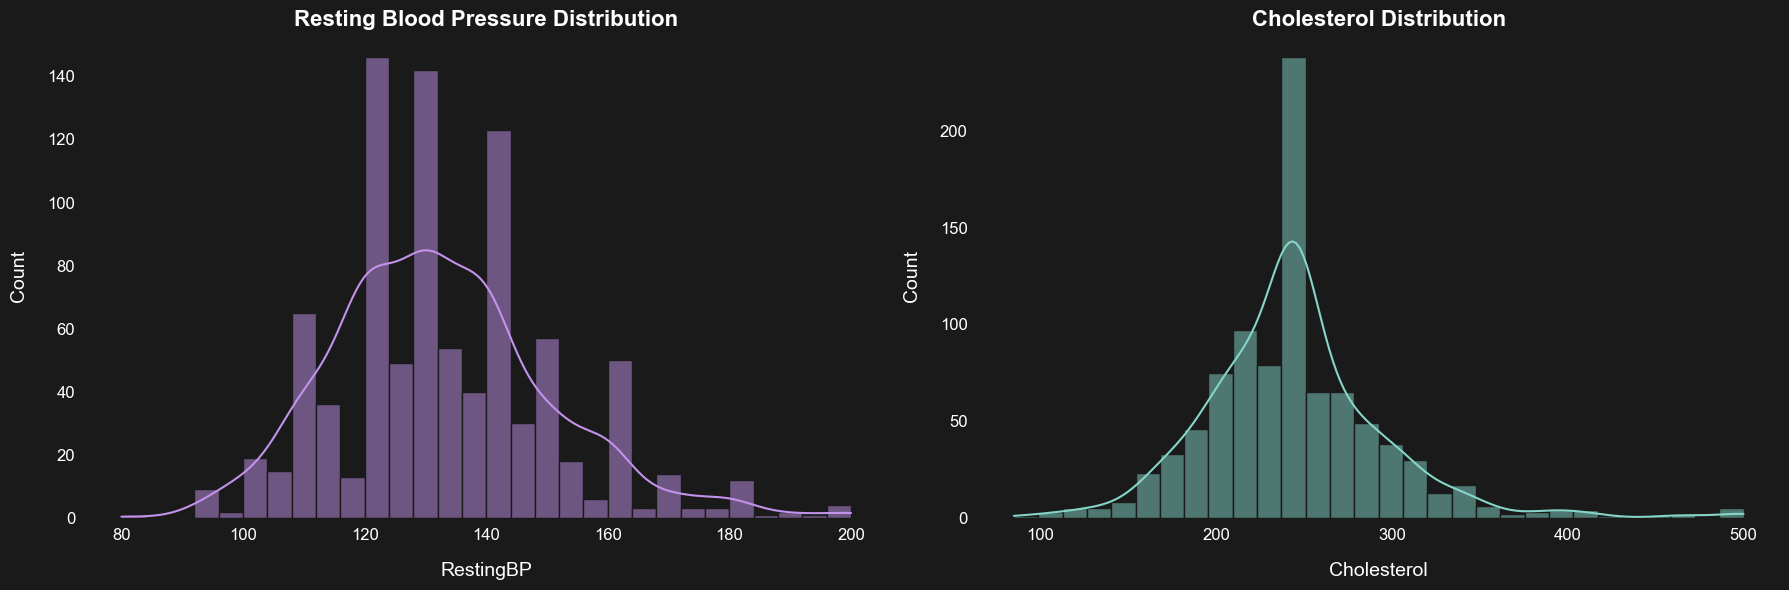

In [8]:
# Import necessary libraries
import numpy as np

# Fixing RestingBP
# Replace the incorrect 0 value with the median
median_bp = df.loc[df["RestingBP"] > 0, "RestingBP"].median()
df["RestingBP"] = df["RestingBP"].replace(0, median_bp)

# Fixing Cholesterol
# Impute missing cholesterol values with the mean of the non-zero cholesterol values
mean_cholesterol = df[df['Cholesterol'] != 0]['Cholesterol'].mean()

# Replace 0s with the mean value
df['Cholesterol'] = df['Cholesterol'].replace(0, mean_cholesterol)

# Cap the cholesterol values at 500 mg/dL
df["Cholesterol"] = df["Cholesterol"].clip(upper=500)

# Two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  

# RestingBP Distribution
sns.histplot(df["RestingBP"], bins=30, kde=True, color="#c392ec", ax=axes[0], edgecolor="#1a1a1a")
axes[0].set_title("Resting Blood Pressure Distribution", color="white")
axes[0].set_xlabel("RestingBP")
axes[0].set_ylabel("Count")

# Cholesterol Distribution
sns.histplot(df["Cholesterol"], bins=30, kde=True, color="#85d5c8", ax=axes[1], edgecolor="#1a1a1a")
axes[1].set_title("Cholesterol Distribution", color="white")
axes[1].set_xlabel("Cholesterol")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# 📊 Analysis of the Fixed Values  

This section reviews the corrections made to **RestingBP** and **Cholesterol** to ensure data accuracy and consistency.  

---

## 🔹 **Resting Blood Pressure (RestingBP)**  
- The **single incorrect value (0)** has been **replaced with the median**, maintaining consistency with the overall distribution.  

---

## 🔹 **Cholesterol**  
- **Zero values** have been **replaced with the mean**, ensuring a more realistic dataset.  
- **Extreme values** have been **capped at 500 mg/dL** to prevent medically unrealistic cholesterol levels.  
- The **final distribution** is **continuous and realistic**, preserving data integrity without creating artificial gaps.  

[Back to Table of Contents](#Table-of-Contents)


# Handling Negative Values and Potential Outliers in Oldpeak

In [9]:
df['Oldpeak'].value_counts(bins=10).sort_index()

(-2.61, -1.72]      2
(-1.72, -0.84]      5
(-0.84, 0.04]     374
(0.04, 0.92]      118
(0.92, 1.8]       236
(1.8, 2.68]       119
(2.68, 3.56]       44
(3.56, 4.44]       17
(4.44, 5.32]        1
(5.32, 6.2]         2
Name: count, dtype: int64

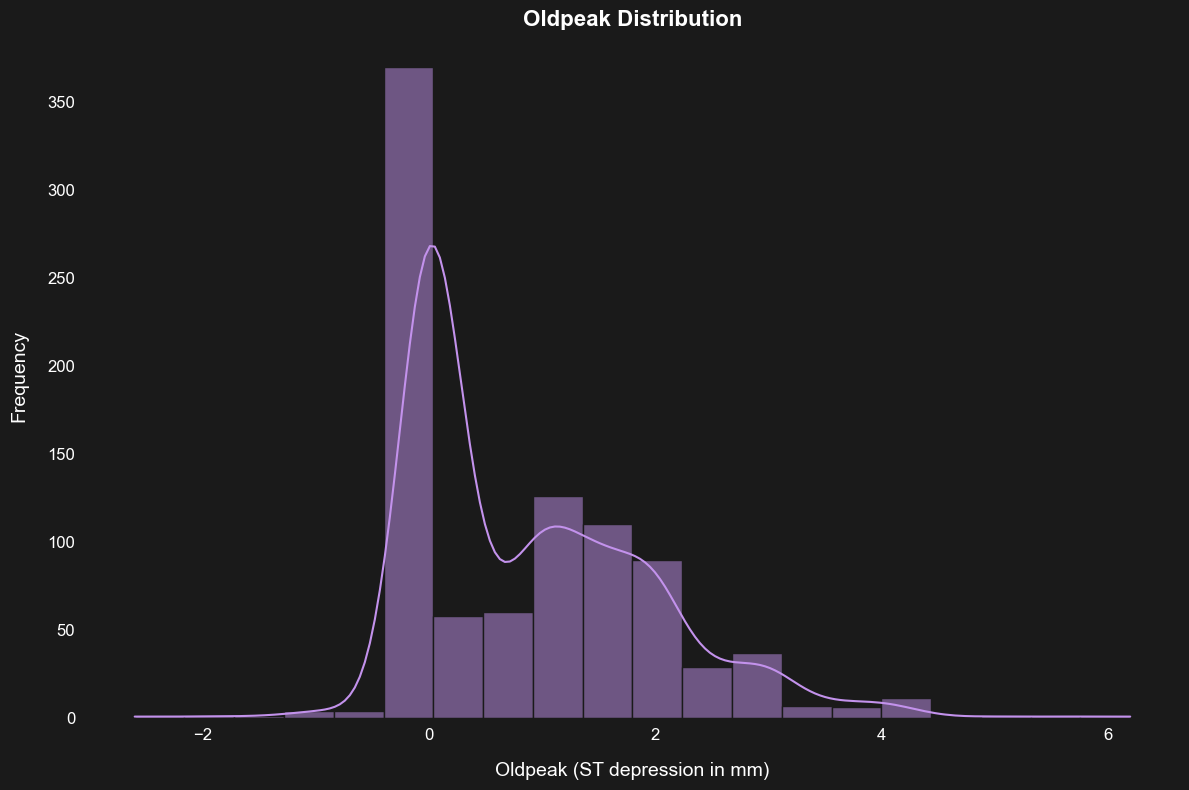

In [10]:
# Visualize the distribution of Oldpeak after taking absolute values
plt.figure(figsize=(12, 8))
sns.histplot(df['Oldpeak'], bins=20, kde=True, color="#c392ec", edgecolor="#1a1a1a")

# Add labels and title
plt.title('Oldpeak Distribution')
plt.xlabel('Oldpeak (ST depression in mm)')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

# ⚠️ Issue with Oldpeak Values  

The **Oldpeak** feature represents **ST segment depression during exercise**, a measure of ischemia (restricted blood flow). **ST depression cannot be negative**, yet the dataset contains values like **-2.6, -2.0, and -1.5**, which are physiologically invalid. These negative values likely result from **data entry errors, measurement inaccuracies, or incorrect encoding**.  

---

## 🔹 **Chosen Method to Fix the Issue**  

To correct this, **negative Oldpeak values were replaced with their absolute values**, ensuring all values remain within the expected range.  

### ✅ **Why This Approach?**  
1. **ST Depression is Always Non-Negative**  
   - Since Oldpeak represents **depression** (not elevation), negative values are not meaningful. Taking the absolute value ensures accuracy.  

2. **Simple and Effective**  
   - Converting negative values to their absolute counterparts is a **straightforward fix** that preserves the magnitude of ST depression without introducing bias.  

3. **Maintains Consistency**  
   - Setting negative values to **zero** would **distort the data**, while taking the absolute value maintains the original distribution.  

[Back to Table of Contents](#Table-of-Contents)


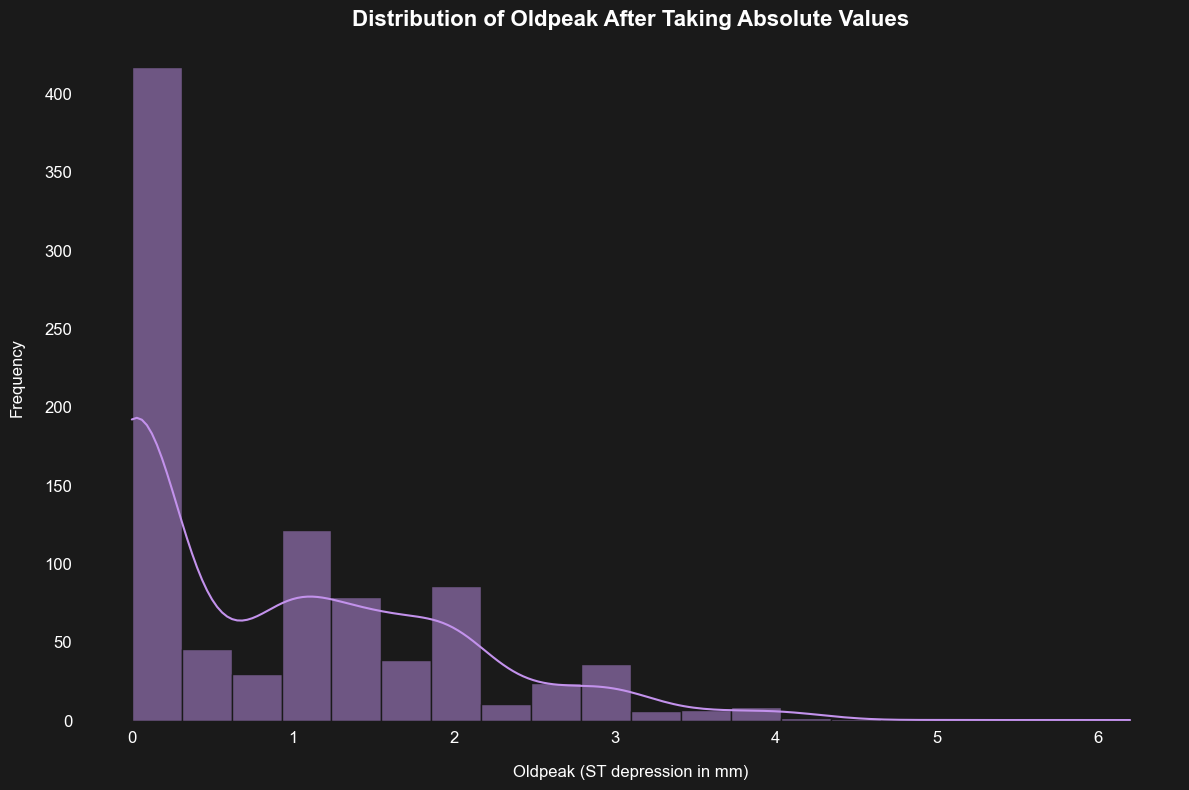

In [11]:
# Taking the Absolute Value of Oldpeak
df["Oldpeak"] = df["Oldpeak"].abs()

# Visualize the distribution of Oldpeak after taking absolute values
plt.figure(figsize=(12, 8))
sns.histplot(df['Oldpeak'], bins=20, kde=True, color="#c392ec", edgecolor="#1a1a1a")

# Add labels and title
plt.title('Distribution of Oldpeak After Taking Absolute Values', fontsize=16)
plt.xlabel('Oldpeak (ST depression in mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Feature Selection

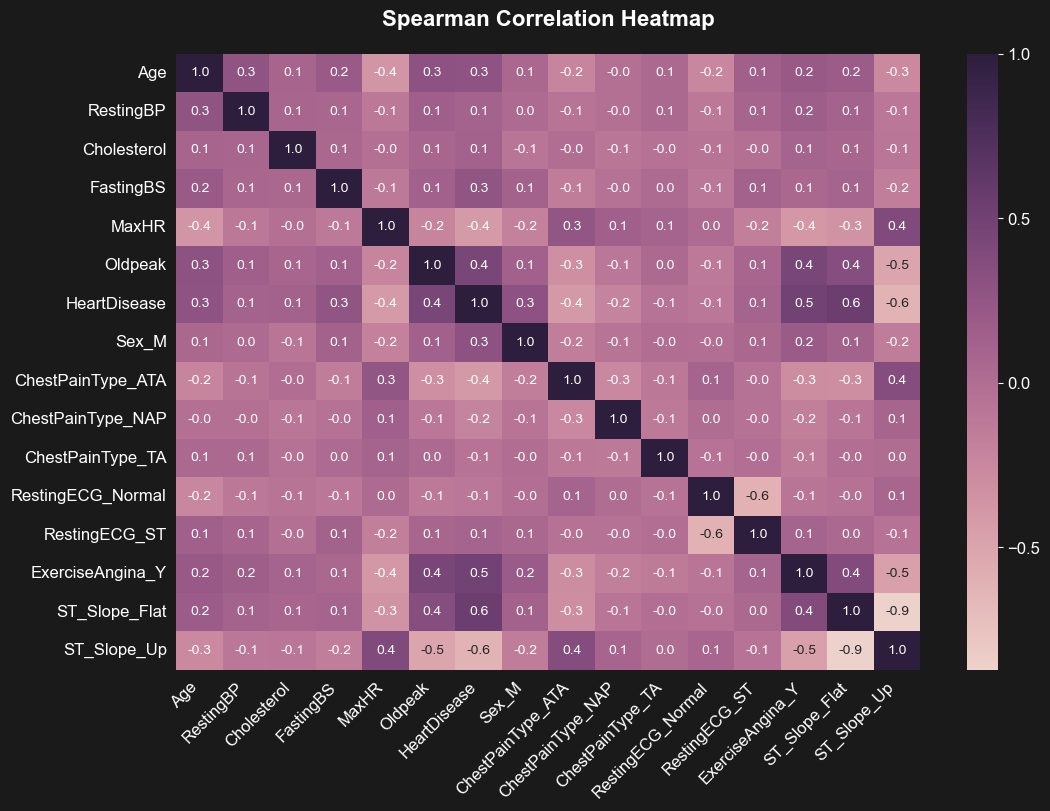

In [12]:
# Convert categorical variables into dummy variables (one-hot encoding)
# drop_first=True avoids multicollinearity by dropping the first category of each feature
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix using Spearman's rank correlation
# Spearman is used because it captures monotonic relationships, even if they are not linear
corr_matrix = df_encoded.corr(method='spearman')

# Set up figure
plt.figure(figsize=(12, 8))

# Create heatmap
ax = sns.heatmap(
    corr_matrix,
    cmap=sns.cubehelix_palette(as_cmap=True),
    annot=True,
    linewidths=0,
    linecolor="#1a1a1a",
    fmt=".1f",
    cbar_kws={"ticks": [-1, -0.5, 0, 0.5, 1]}
)

# Customize xticks
plt.xticks(rotation=45, ha='right')

# Add title
plt.title("Spearman Correlation Heatmap", pad=20)

# Display plot
plt.show()

In [13]:
# Extract absolute correlations with the target variable (HeartDisease)
correlations = abs(corr_matrix["HeartDisease"])

# Set the minimum correlation threshold
threshold = 0.1

# Select features that have a correlation greater than the threshold
selected_features = correlations[correlations > threshold].index.drop("HeartDisease")

# Nicely print the selected features
print("\nSelected Features (|Spearman correlation| ≥ 0.1 with HeartDisease):\n")
for feature in selected_features:
    print(f"- {feature}")


Selected Features (|Spearman correlation| ≥ 0.1 with HeartDisease):

- Age
- RestingBP
- Cholesterol
- FastingBS
- MaxHR
- Oldpeak
- Sex_M
- ChestPainType_ATA
- ChestPainType_NAP
- RestingECG_ST
- ExerciseAngina_Y
- ST_Slope_Flat
- ST_Slope_Up


## Feature Selection Process  

This section outlines the steps taken to select the most relevant features for predicting **HeartDisease** while reducing noise and improving model performance.  

---

### 🔹 **Encoding Categorical Variables**  
- **One-hot encoding** was applied to convert categorical features into numerical format.  
- We set **`drop_first=True`** to prevent **multicollinearity**, ensuring that redundant categories do not interfere with the model.  

---

### 🔹 **Choosing a Correlation Coefficient**  
- We used **Spearman's rank correlation** to measure feature relationships with **HeartDisease**.  
- **Why Spearman?** Unlike Pearson correlation, it detects **monotonic** relationships, making it more suitable for this dataset, where associations may not be strictly linear.  

---

### 🔹 **Setting a Correlation Threshold**  
- Features with an absolute **Spearman correlation ≥ |0.1|** were selected.  
- This ensures we retain **meaningful predictors** while filtering out weakly correlated variables that could introduce noise.  

---

### 📌 **Selected Features**  

#### **✅ Numerical Features:**  
- **Age**  
- **RestingBP**  
- **FastingBS**  
- **MaxHR**  
- **Oldpeak**  

#### **✅ Encoded Categorical Features:**  
- **Sex_M**  
- **ChestPainType_ATA**  
- **ChestPainType_NAP**  
- **RestingECG_ST**  
- **ExerciseAngina_Y**  
- **ST_Slope_Flat**  
- **ST_Slope_Up**  

These features demonstrate the strongest associations with heart disease and will be used in the predictive modeling phase. 🚀  

[Back to Table of Contents](#Table-of-Contents)


# Building k-NN Classifiers With Individual Features

In [14]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Select the features to be used for training
X = df_encoded[selected_features]  # Using the features selected earlier
y = df_encoded['HeartDisease']  # Target variable

# Define split percentage and ensure reproducibility
random_state = 42
test_size = 0.3  

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state
)

# Set number of neighbors
k = 5  

# Iterate through selected features
for feature in selected_features:
    # Initialize and train the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[[feature]], y_train)

    # Predict on the validation set
    y_pred = knn.predict(X_val[[feature]])

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)

    # Print results
    print(f"Feature: {feature:<20} Accuracy: {accuracy:.4f}")

Feature: Age                  Accuracy: 0.6123
Feature: RestingBP            Accuracy: 0.5362
Feature: Cholesterol          Accuracy: 0.6051
Feature: FastingBS            Accuracy: 0.5942
Feature: MaxHR                Accuracy: 0.6413
Feature: Oldpeak              Accuracy: 0.6775
Feature: Sex_M                Accuracy: 0.6812
Feature: ChestPainType_ATA    Accuracy: 0.7283
Feature: ChestPainType_NAP    Accuracy: 0.5942
Feature: RestingECG_ST        Accuracy: 0.5942
Feature: ExerciseAngina_Y     Accuracy: 0.6993
Feature: ST_Slope_Flat        Accuracy: 0.5942
Feature: ST_Slope_Up          Accuracy: 0.8007


## 📊 Model Performance Overview  

This section evaluates the predictive power of individual features in classifying **HeartDisease**, based on accuracy scores from a k-NN classifier.  

---

### 🔹 **Top-Performing Feature**  
- **ST_Slope_Up** achieved the highest accuracy at **80.07%**.  
- This suggests that an **upward ST segment slope** on an ECG could be a strong indicator of heart disease, possibly reflecting ischemic changes during exercise.  

---

### 🔹 **Lower-Performing Features**  
The following features produced relatively lower accuracy scores (**~59%**):  
- **RestingBP**  
- **FastingBS**  
- **ChestPainType_NAP**  
- **RestingECG_ST**  
- **ST_Slope_Flat**  

### **Possible Reasons for Lower Accuracy:**  
✔ These features may have **weaker individual predictive power**.  
✔ They could be **highly correlated** with other features, leading to redundancy.  
✔ They might require **combination with other features** to improve classification performance.  

[Back to Table of Contents](#Table-of-Contents)


# Building k-NN Classifier With All Selected Features

In [15]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
grid_params = {
    'n_neighbors': list(range(1, 51, 2)),  # Only odd numbers to avoid ties
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming'],
    'weights': ['uniform', 'distance']  # Test equal weights vs. distance-based
}

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform Grid Search with cross-validation (5-fold) to find the best parameters
knn_grid = GridSearchCV(knn_classifier, grid_params, scoring='accuracy', cv=5, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

# Best parameters and accuracy
best_score = knn_grid.best_score_
best_params = knn_grid.best_params_

# Display the best model's accuracy and parameters in a more appealing way
print("\n" + "="*74)
print("Best Model Performance:")
print("-"*74)
print(f"Accuracy: {best_score*100:.2f}%")
print(f"Parameters: {best_params}")
print("="*74)

# Evaluate the best model on the test set and present the results
test_accuracy = knn_grid.best_estimator_.score(X_test_scaled, y_test)

# Print a nicely formatted table for test accuracy
table_data = [
    ["Best Model Accuracy (Train Set)", f"{best_score*100:.2f}%"],
    ["Model Accuracy on Test Set", f"{test_accuracy*100:.2f}%"]
]

print("\nTest Set Evaluation:")
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt="fancy_grid"))
print("="*74)


Best Model Performance:
--------------------------------------------------------------------------
Accuracy: 86.60%
Parameters: {'metric': 'hamming', 'n_neighbors': 15, 'weights': 'uniform'}

Test Set Evaluation:
╒═════════════════════════════════╤═════════╕
│ Metric                          │ Value   │
╞═════════════════════════════════╪═════════╡
│ Best Model Accuracy (Train Set) │ 86.60%  │
├─────────────────────────────────┼─────────┤
│ Model Accuracy on Test Set      │ 88.77%  │
╘═════════════════════════════════╧═════════╛


# 📊 Model Performance and Discussion  

## ✅ Accuracy and Optimal Parameters  
The best **k-NN model** achieved:  
- **Training Accuracy**: **86.60%**  
- **Test Accuracy**: **88.77%**  
- **Optimal Hyperparameters**:  
  - **Metric**: Hamming  
  - **Neighbors (k)**: 15  
  - **Weights**: Uniform  

---

## 🔍 Why is Test Accuracy Higher?  
It is unusual but possible for a model to perform slightly better on the test set than on the training set. Possible explanations include:  
✔ **Data Splitting Variance**: The test set may contain easier-to-classify cases.  
✔ **Regularization via k-NN**: The choice of **k = 15** provides a smoothing effect, improving generalization.  
✔ **Hyperparameter Optimization**: Tuning techniques like **RandomizedSearchCV** may have yielded a well-balanced model.  
✔ **Interpolation Effects**: Certain preprocessing steps (e.g., **mean imputation**) may have influenced the distribution of test data.  

---

## ⚖️ Real-World Implications: Strengths & Limitations  

### ✅ **Pros**  
✔ **Interpretable**: k-NN's similarity-based approach is easy to explain in medical settings.  
✔ **Non-Parametric**: Works well with different data distributions.  
✔ **Captures Non-Linear Relationships**: Can model complex decision boundaries naturally.  

### ⚠️ **Cons**  
❌ **Computationally Expensive**: Slower on large datasets due to distance calculations.  
❌ **Feature Sensitivity**: Poorly chosen features can degrade performance.  
❌ **No Probabilistic Outputs**: Unlike logistic regression, k-NN lacks confidence scores, which are valuable in medical decision-making.  

[Back to Table of Contents](#Table-of-Contents)


---

# Conclusion  

This project aimed to predict **heart disease risk** using machine learning, with a focus on feature selection and **k-NN model optimization**.  

✔ **Feature Selection**: Used **Spearman correlation analysis** to refine predictors.  
✔ **Preprocessing**: Applied scaling and hyperparameter tuning to improve results.  
✔ **Final Model Performance**: **Training: 86.60%** | **Test: 88.77%**  
✔ **Optimal Hyperparameters**: **15 neighbors, Hamming metric, uniform weighting**  

📌 **Key Takeaway**: The model effectively predicts heart disease risk, though further optimization—such as testing additional algorithms or refining feature engineering—could yield even better performance. 🚀  
